In [4]:
import numpy as np 
import pandas as pd 

In [5]:
stro=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")


stro. drop('bmi', axis=1, inplace=True)


In [6]:
stro.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [7]:
stro.shape

(5110, 11)

In [8]:
stro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [9]:
stro.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [10]:
stro.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
stro.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,1.000000


In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
encoder = LabelEncoder()
stro['gender'] = encoder.fit_transform(stro['gender'])
gender = {index : label for index, label in enumerate(encoder.classes_)}
gender

{0: 'Female', 1: 'Male', 2: 'Other'}

In [14]:
stro['ever_married'] = encoder.fit_transform(stro['ever_married'])
ever_married = {index : label for index, label in enumerate(encoder.classes_)}
ever_married

{0: 'No', 1: 'Yes'}

In [15]:
stro['work_type'] = encoder.fit_transform(stro['work_type'])
work_type = {index : label for index, label in enumerate(encoder.classes_)}
work_type

{0: 'Govt_job',
 1: 'Never_worked',
 2: 'Private',
 3: 'Self-employed',
 4: 'children'}

In [16]:
stro['Residence_type'] = encoder.fit_transform(stro['Residence_type'])
Residence_type = {index : label for index, label in enumerate(encoder.classes_)}
Residence_type

{0: 'Rural', 1: 'Urban'}

In [17]:
stro['smoking_status'] = encoder.fit_transform(stro['smoking_status'])
smoking_status = {index : label for index, label in enumerate(encoder.classes_)}
smoking_status

{0: 'Unknown', 1: 'formerly smoked', 2: 'never smoked', 3: 'smokes'}

In [18]:
x = stro.drop('stroke', axis=1)
y = stro['stroke']

In [19]:
from sklearn.impute import SimpleImputer
import numpy as np

In [20]:
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(x)
X = ImputedX.transform(x)


#X Data
print('X Data is \n' , X[:10])

#y Data
print('y Data is \n' , y[:10])

X Data is 
 [[9.0460e+03 1.0000e+00 6.7000e+01 0.0000e+00 1.0000e+00 1.0000e+00
  2.0000e+00 1.0000e+00 2.2869e+02 1.0000e+00]
 [5.1676e+04 0.0000e+00 6.1000e+01 0.0000e+00 0.0000e+00 1.0000e+00
  3.0000e+00 0.0000e+00 2.0221e+02 2.0000e+00]
 [3.1112e+04 1.0000e+00 8.0000e+01 0.0000e+00 1.0000e+00 1.0000e+00
  2.0000e+00 0.0000e+00 1.0592e+02 2.0000e+00]
 [6.0182e+04 0.0000e+00 4.9000e+01 0.0000e+00 0.0000e+00 1.0000e+00
  2.0000e+00 1.0000e+00 1.7123e+02 3.0000e+00]
 [1.6650e+03 0.0000e+00 7.9000e+01 1.0000e+00 0.0000e+00 1.0000e+00
  3.0000e+00 0.0000e+00 1.7412e+02 2.0000e+00]
 [5.6669e+04 1.0000e+00 8.1000e+01 0.0000e+00 0.0000e+00 1.0000e+00
  2.0000e+00 1.0000e+00 1.8621e+02 1.0000e+00]
 [5.3882e+04 1.0000e+00 7.4000e+01 1.0000e+00 1.0000e+00 1.0000e+00
  2.0000e+00 0.0000e+00 7.0090e+01 2.0000e+00]
 [1.0434e+04 0.0000e+00 6.9000e+01 0.0000e+00 0.0000e+00 0.0000e+00
  2.0000e+00 1.0000e+00 9.4390e+01 2.0000e+00]
 [2.7419e+04 0.0000e+00 5.9000e+01 0.0000e+00 0.0000e+00 1.0000e+00


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.12321436 0.5        0.81689453 0.         1.         1.
  0.5        1.         0.80126489 0.33333333]
 [0.70820468 0.         0.74365234 0.         0.         1.
  0.75       0.         0.67902317 0.66666667]
 [0.42601512 0.5        0.97558594 0.         1.         1.
  0.5        0.         0.23451205 0.66666667]
 [0.8249283  0.         0.59716797 0.         0.         1.
  0.5        1.         0.53600776 1.        ]
 [0.02192856 0.         0.96337891 1.         0.         1.
  0.75       0.         0.54934909 0.66666667]
 [0.77672115 0.5        0.98779297 0.         0.         1.
  0.5        1.         0.60516111 0.33333333]
 [0.73847653 0.5        0.90234375 1.         1.         1.
  0.5        0.         0.06910719 0.66666667]
 [0.14226119 0.         0.84130859 0.         0.         0.
  0.5        1.         0.1812852  0.66666667]
 [0.37533792 0.         0.71923828 0.         0.         1.
  0.5        0.         0.09708245 0.        ]
 [0.82916855 0.         0.9511718

In [23]:
stro.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [24]:
stro.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [27]:
print("x_train shape is:",x_train.shape)

x_train shape is: (3832, 10)


In [28]:
print("x_test shape is:",x_test.shape)

x_test shape is: (1278, 10)


In [29]:
print("y_train shape is:",y_train.shape)

y_train shape is: (3832,)


In [30]:
print("y_test shape is:",y_test.shape)

y_test shape is: (1278,)


In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=21) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9519832985386222
RandomForestClassifierModel Test Score is :  0.9491392801251957
RandomForestClassifierModel features importances are :  [0.142858   0.01251376 0.41807824 0.03605833 0.06561893 0.04210783
 0.04061351 0.00961344 0.19745019 0.0350878 ]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.75659906 0.24340094]
 [0.99798118 0.00201882]
 [0.95507376 0.04492624]
 [0.99284076 0.00715924]
 [0.99765025 0.00234975]
 [0.9799451  0.0200549 ]
 [0.96180441 0.03819559]
 [0.95605642 0.04394358]
 [0.96244712 0.03755288]
 [0.77039061 0.22960939]]


In [33]:
RandomForestClassifierModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}

In [34]:
from sklearn.model_selection import GridSearchCV


In [35]:
parameters = {'max_features':[2, 4, 11], 'n_estimators':[50, 100, 150], 'min_samples_split':[2, 3, 4, 5]}
rf_search = GridSearchCV(RandomForestClassifierModel, parameters, scoring='neg_mean_squared_error', cv=5)
rf_search.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=21),
             param_grid={'max_features': [2, 4, 11],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [36]:
y_pred = rf_search.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score


In [38]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  1213


In [39]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.9491392801251957


In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Confusion Matrix is : 
 [[1213    0]
 [  65    0]]


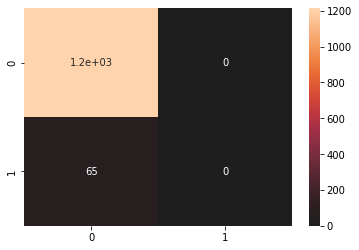

In [41]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,annot=True)
plt.show()